In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from sklearn.cluster import KMeans

In [2]:
# Import data of prices of multiapartment houses in one of the Bronx zip codes 10466
df = pd.read_csv('REzip10466.csv')
df.head()

,Unnamed: 0,borough,neighborhood,building_class_category,tax_class_present,block,lot,easement,building_class_present,address,...,land_sq_feet,gross_sq_feet,year_built,tax_class_time_sale,build_class_time_sale,sale_price,sale_date,serialid,sale_year,sale_month
0,4686,2,WAKEFIELD,07 RENTALS - WALKUP APARTMENTS,2B,4993,84,NaN,C1,4229 CARPENTER AVENUE,...,2752,7745,2009,2,C1,700000,2009-07-06,4686,9,6
1,5140,2,WILLIAMSBRIDGE,07 RENTALS - WALKUP APARTMENTS,2A,4833,15,NaN,C2,685 EAST 230 STREET,...,2867,3700,1930,2,C2,335000,2009-10-09,5140,9,9
2,5141,2,WILLIAMSBRIDGE,07 RENTALS - WALKUP APARTMENTS,2B,4834,14,NaN,C1,683 EAST 231ST STREET,...,3440,5250,1931,2,C1,510000,2009-10-01,5141,9,9
3,5146,2,WILLIAMSBRIDGE,07 RENTALS - WALKUP APARTMENTS,2A,4847,43,NaN,C2,812 EAST 223RD ST,...,2856,4082,1927,2,C2,285000,2009-11-06,5146,9,10
4,5147,2,WILLIAMSBRIDGE,07 RENTALS - WALKUP APARTMENTS,2A,4847,43,NaN,C2,812 EAST 223 STREET,...,2856,4082,1927,2,C2,198558,2009-05-15,5147,9,4


In [3]:
# Select three features of the multiapartment houses
X = np.matrix(df[['land_sq_feet','gross_sq_feet','residential_units']])

(0, 25000)

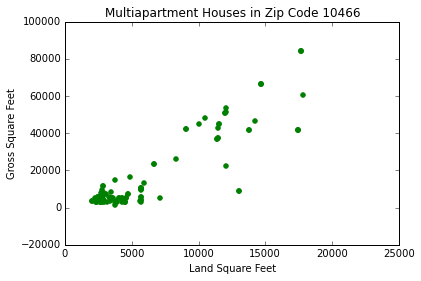

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.array(X[:,0]), np.array(X[:,1]),color='green')
ax.set_xlabel('Land Square Feet')
ax.set_ylabel('Gross Square Feet')
ax.set_title("Multiapartment Houses in Zip Code 10466")
ax.set_xlim(0,25000)

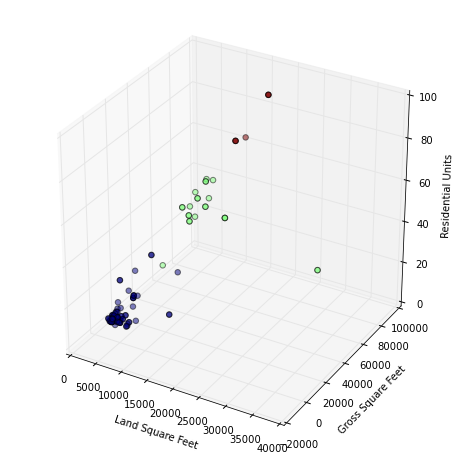

In [5]:
# Plot the three clusters of multiapartment houses classified by their three features
est = KMeans(n_clusters=3,n_init=100)
est.fit(X)
labels = est.labels_
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(X[:,0]), np.array(X[:,1]), np.array(X[:,2]),
        'o', s=30,c=labels.astype(np.float), alpha=0.5)
ax.set_xlabel('Land Square Feet')
ax.set_ylabel('Gross Square Feet')
ax.set_zlabel('Residential Units')

In [8]:
fig.savefig('apt_cluster.png')